# Exploratory Data Analysis

### 8. Load the Titanic dataset and perform univariate and bivariate analysis on numerical and categorical features.

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import numpy as np

In [34]:
import matplotlib.pyplot as plt

In [7]:
df=pd.DataFrame(sns.load_dataset('titanic'))

In [8]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [10]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [12]:
df.shape

(891, 15)

In [13]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
df_object=df[(df.select_dtypes(include=['object']).columns)]

In [19]:
df_object.head()

,sex,embarked,who,embark_town,alive
0,male,S,man,Southampton,no
1,female,C,woman,Cherbourg,yes
2,female,S,woman,Southampton,yes
3,female,S,woman,Southampton,yes
4,male,S,man,Southampton,no


In [21]:
df.age.mean()

np.float64(29.69911764705882)

In [22]:
df.age.median()

28.0

In [23]:
df.age.mode()

0    24.0
Name: age, dtype: float64

In [30]:
l=df.groupby('sex')['survived'].mean()

In [31]:
l.head()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

### 9. Identify and visualize outliers using boxplots and z-score analysis.

In [32]:
plt.figure(figsize=(12,6))

<Axes: xlabel='age'>

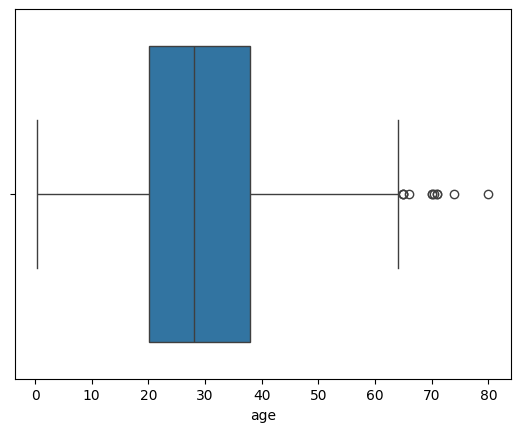

In [43]:
sns.boxplot(df.age, orient = 'h')

In [251]:
## Z score
df=pd.DataFrame(sns.load_dataset('titanic'))
new_df=df.dropna()

In [252]:
Z_score_age = (new_df.age-new_df.age.mean())/new_df.age.std()

In [254]:
new_df['Z_score']=Z_score_age

C:\Users\user\AppData\Local\Temp\ipykernel_25584\2199489939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Z_score']=Z_score_age


In [255]:
new_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Z_score
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0.151664
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,-0.039765
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,1.172618
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,-2.017864
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,1.427856


In [262]:
outliers = new_df.fare[(new_df.Z_score>=3) | (new_df.Z_score<=-3)]

In [263]:
print(outliers)

Series([], Name: fare, dtype: float64)


### 10. Display the correlation matrix and visually interpret relationships using seaborn.heatmap().


In [111]:
iris=pd.DataFrame(sns.load_dataset('iris'))

In [112]:
from sklearn.preprocessing import OneHotEncoder

In [113]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [114]:
OH=OneHotEncoder(sparse_output=False)

In [115]:
iris.species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [116]:
new=pd.DataFrame(OH.fit_transform(iris[['species']]))

In [124]:
iris_encoded=iris.join(new)

In [131]:
iris_encoded=iris_encoded.drop('species', axis=1, inplace=False)

In [76]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<Axes: >

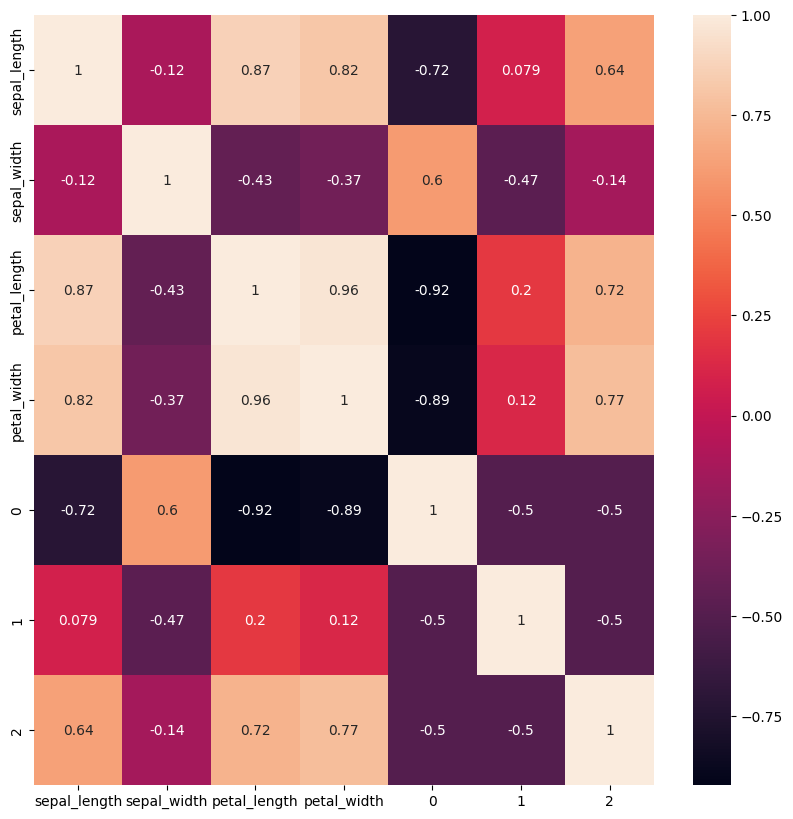

In [136]:
plt.figure(figsize=(10,10))
sns.heatmap(cor, annot=True)

In [135]:
cor=iris_encoded.corr()

### 11. Compute and interpret mean, median, mode, variance, and standard deviation for a given dataset.

In [145]:
print(df.age.mean())
print(df.age.median())

29.69911764705882
28.0


In [143]:
print(df.age.mode())


0    24.0
Name: age, dtype: float64


In [144]:
print(df.age.std())

14.526497332334044


### 12. Load a dataset with missing values. Demonstrate imputation using mean, median, and mode techniques.

In [183]:
df=pd.DataFrame(sns.load_dataset('titanic'))

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [185]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [186]:
df.deck.value_counts()


deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [187]:
df.deck=df.deck.fillna('C')

In [188]:
df.deck.isnull().sum()

np.int64(0)

In [189]:
mean=df.age.mean()
df.age=df.age.fillna(mean)
df.age.isnull().sum()

np.int64(0)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [191]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [192]:
df=df.dropna()

In [194]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

### 13. Write a custom function that removes rows where more than 30% of data is missing.

In [239]:
def rem30(df):
    import math
    th = 0.3*df.shape[1]
    import pandas as pd
    for i,row in df.iterrows():
        count=0
        for col in df:
            if(math.isnan(row[col])):
                count += 1
        if (count>= th):
            df=df.drop(index = i)
    return df    


In [237]:
marks=pd.DataFrame({'A':[10,20,None],'B':[10,20,None],'C':[10,20,None],'D':[10,20,30],'E':[10,20,40],'F':[10,20,50]})
marks

,A,B,C,D,E,F
0,10.0,10.0,10.0,10,10,10
1,20.0,20.0,20.0,20,20,20
2,NaN,NaN,NaN,30,40,50


In [240]:
marks=rem30(marks)
marks

,A,B,C,D,E,F
0,10.0,10.0,10.0,10,10,10
1,20.0,20.0,20.0,20,20,20
